# US International passengers analysis

In this notebook it is going to analyze International report passengers to figure it out how many flight by period have operated by airlines

Conclusion:
* We have 30 completed years of data
* We can group data into period to analyze
* We could get a forecast for 2020 to predict how many passangers would be in 2020
* Only 8.25% of airlines operates 80 percents of flight in 30 years
* We can group data by periods to get the total's flight 

Next Steps:
* Create a train model code to test arima vs exponential smoothing

# Libraries

In [1]:
import pandas as pd
from pmdarima import auto_arima
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose


# Data

In [2]:
data = pd.read_csv('../rootstrap/data/International_Report_Passengers.csv',
                   date_parser=True,
                   infer_datetime_format='mm/dd/yyyy',)

In [3]:
data.head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2014,2014,5,14492,RDU,36,11032,CUN,148,19534,AM,0,Passengers,0,315,315
1,06/01/2007,2007,6,13204,MCO,33,16085,YHZ,951,20364,C6,0,Passengers,0,683,683
2,12/01/2005,2005,12,11433,DTW,43,10411,AUA,277,20344,RD,1,Passengers,0,1010,1010
3,04/01/2003,2003,4,13487,MSP,63,16304,ZIH,148,20204,MG,1,Passengers,0,508,508
4,12/01/2005,2005,12,12016,GUM,5,11138,CRK,766,20312,TZ,1,Passengers,0,76,76


In [4]:
# Convert date to datetime
data.data_dte = pd.to_datetime(data.data_dte)

In [5]:
print(f'Min date is {data.data_dte.min()} \nMax date is {data.data_dte.max()}\nWe have {data.Year.max()-data.Year.min()} years of data')

Min date is 1990-01-01 00:00:00 
Max date is 2020-03-01 00:00:00
We have 30 years of data


In [6]:
## Checking how many completed perdiod do I have
data[['Year','Month']].drop_duplicates().sort_values(['Year','Month']).groupby('Year').count().loc[lambda x: x.Month==12]

,Month
Year,
1990,12
1991,12
1992,12
1993,12
1994,12
1995,12
1996,12
1997,12
1998,12


**Here are 30 completed years, and in the last year (2020) there are only three months**

## Analyzing total flights per year

<AxesSubplot: xlabel='Year'>

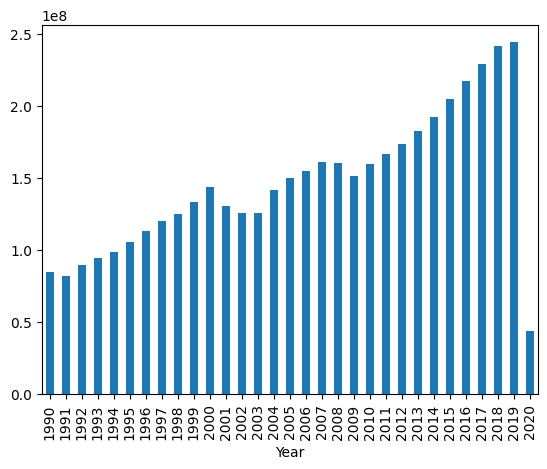

In [7]:
data.groupby('Year').Total.sum().sort_index().plot(kind='bar')

**There are an increment in flights since 1990 to 2019, we could expect that 2020 have more flights than previous year**

### Analyzing data per period

In [8]:
# creation of period's column
data['period'] = data.data_dte.dt.to_period('M')

In [9]:
# Defining new dataframe
time_series = data.groupby('period').Total.sum()

<AxesSubplot: xlabel='period'>

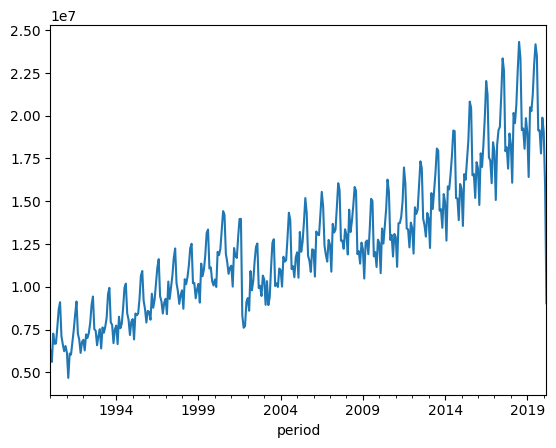

In [10]:
time_series.plot(kind='line')

In [11]:
time_series

period
1990-01     6271648
1990-02     5608228
1990-03     7261485
1990-04     6666438
1990-05     6684581
             ...   
2019-11    17793847
2019-12    19887403
2020-01    19044076
2020-02    15875722
2020-03     9032188
Freq: M, Name: Total, Length: 363, dtype: int64

In [12]:
pd.DataFrame(time_series)

,Total
period,
1990-01,6271648
1990-02,5608228
1990-03,7261485
1990-04,6666438
1990-05,6684581
...,...
2019-11,17793847
2019-12,19887403
2020-01,19044076


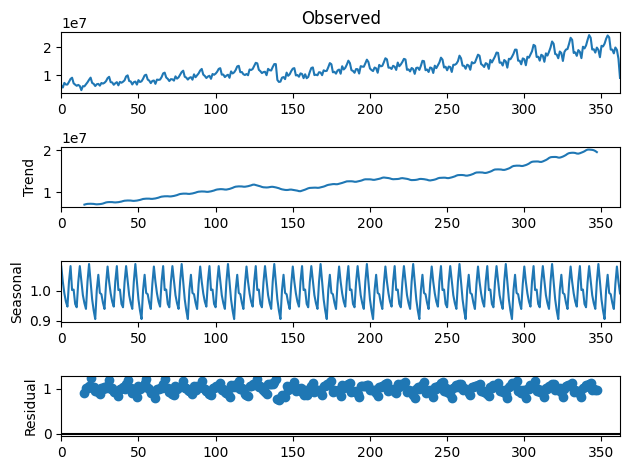

In [13]:
# Time series descomposition
result = seasonal_decompose(time_series.values, model='multiplicative', period=30)
result.plot()
pyplot.show()

* We can see that in the first bar plot the passengers increase through the years, and in the second graph It can see the time series behavior, and how is its seasonality 

* In descomposition we can see the trend is increating

* A forecasting could be created to know how many passengers could be in all 2020

# Airlines analysis

In [14]:
n_airlines = data.airlineid.drop_duplicates().count()
print(f'There are {n_airlines} different airlines')

There are 570 different airlines


In [15]:
data.isna().sum()

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         2797
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
period             0
dtype: int64

In [16]:
#Checking if there are any null in date values in columns of interest
print(f'There are {data.data_dte.isna().sum()} null values in date_dte\nThere are {data.Total.isna().sum()} null values in Total')

There are 0 null values in date_dte
There are 0 null values in Total


## How many flight per airlines

In [17]:
data_airlines = data.groupby('airlineid').Total.sum().sort_values(ascending=False).to_frame()

In [18]:
data_airlines['perc'] = data_airlines['Total']/sum(data_airlines['Total'])*100
data_airlines['perc_cum'] = data_airlines['perc'].cumsum()
data_airlines

,Total,perc,perc_cum
airlineid,,,
19805,589094099,1.295850e+01,12.958496
19977,417372862,9.181088e+00,22.139584
19790,384190962,8.451175e+00,30.590758
19704,173862884,3.824519e+00,34.415277
19540,172993518,3.805395e+00,38.220673
...,...,...,...
20349,4,8.798931e-08,100.000000
20226,3,6.599198e-08,100.000000
20342,2,4.399466e-08,100.000000


## Pareto analysis

In [19]:
# Printed airlines that represent 80 percents of flight from 1990
main_airlines = data_airlines.loc[lambda x:x.perc_cum<=80]
main_airlines

,Total,perc,perc_cum
airlineid,,,
19805,589094099,12.958496,12.958496
19977,417372862,9.181088,22.139584
19790,384190962,8.451175,30.590758
19704,173862884,3.824519,34.415277
19540,172993518,3.805395,38.220673
19386,142563529,3.136017,41.356689
19531,142517235,3.134998,44.491688
19554,121852568,2.680431,47.172118
20355,103393413,2.274379,49.446497


In [20]:
print(f'There are {len(main_airlines)} airlines that represent 80 percents of flights\nThese airlines represent {round(len(main_airlines)/data.airlineid.nunique()*100,2)}% of all airlines')

There are 47 airlines that represent 80 percents of flights
These airlines represent 8.25% of all airlines


# Model training

## Splitting data into tran and test

In [21]:
train = time_series[48:-15]
test = time_series[-15:-3]

In [22]:
# Testing an auto_arima model
arima_m = auto_arima(train,
                     start_p=0, 
                     d=1,
                     start_q=0, 
                     max_p=5, 
                     max_d=5,
                     max_q=5,
                     start_P=0,
                     start_Q=0,
                     D=1,
                     max_D=5,
                     max_P=5,
                     max_Q=5,
                     seasonal=True,
                     m=12,
                     random_state=5)

In [23]:
#Paramenters to use in model
arima_m.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (1, 1, 1),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 1, 2, 12),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

In [24]:
#Getting predictions
prediction = arima_m.predict(12)
prediction.index=test.index
prediction

period
2019-01    1.936100e+07
2019-02    1.710838e+07
2019-03    2.080045e+07
2019-04    2.038034e+07
2019-05    2.134716e+07
2019-06    2.313751e+07
2019-07    2.495887e+07
2019-08    2.416282e+07
2019-09    2.005675e+07
2019-10    2.012260e+07
2019-11    1.890862e+07
2019-12    2.082218e+07
Freq: M, dtype: float64

In [25]:
# Cheking result in a visual way

In [26]:
train.index = train.index.astype(str)
test.index = test.index.astype(str)
prediction.index = prediction.index.astype(str)

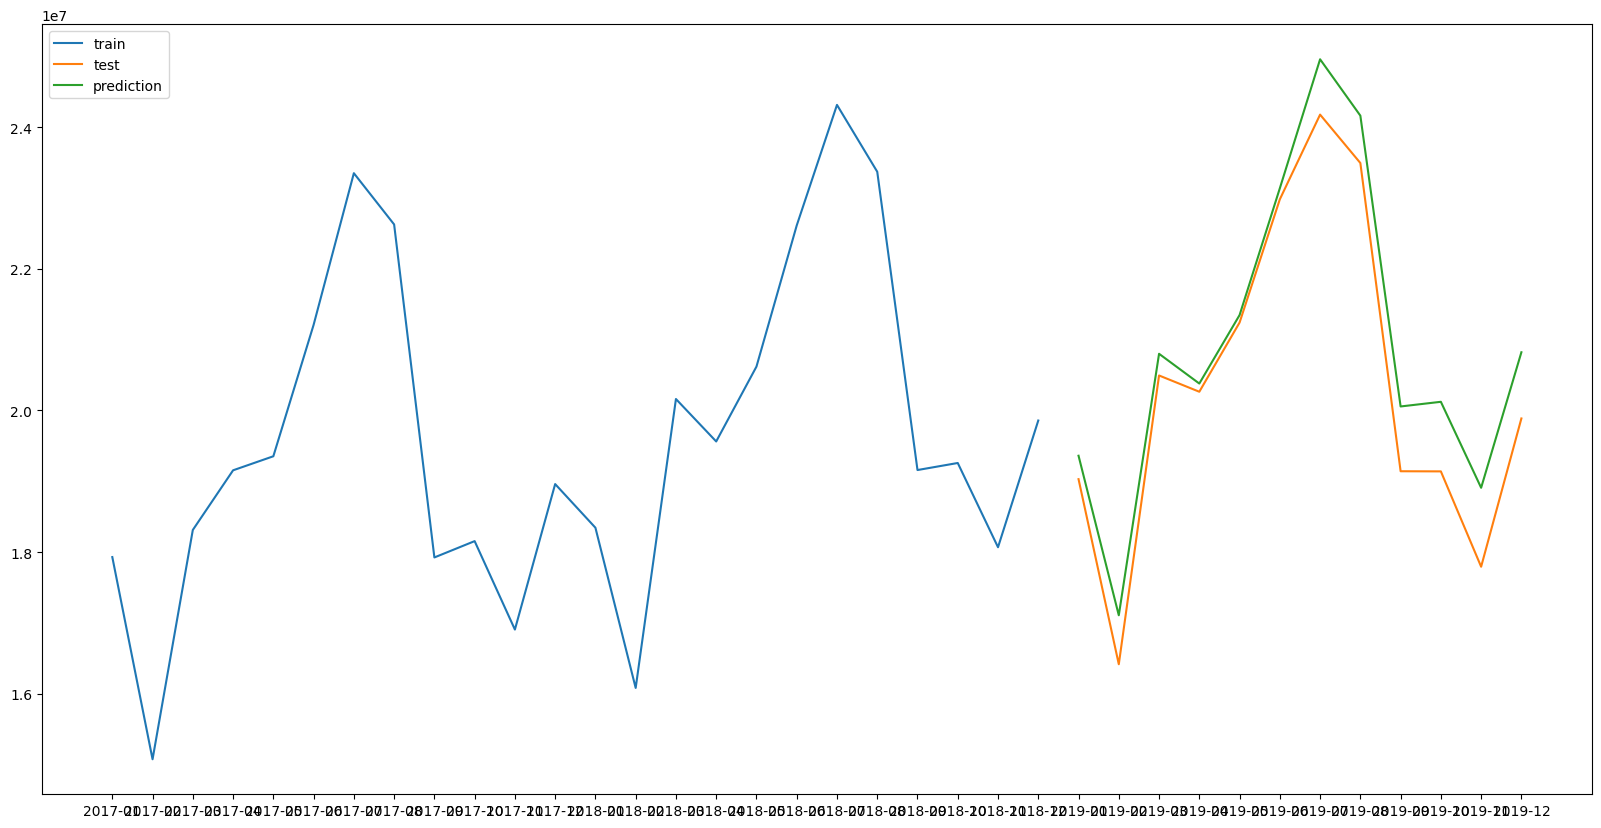

In [27]:
plt.figure(figsize=(20,10))
plt.plot(train[-24:], label='train')
plt.plot(test, label='test')
plt.plot(prediction, label='prediction')
plt.legend(loc="upper left")

# Metrics

In [28]:
print(f'R2 score for Arima model is: {round(r2_score(test, prediction),2)}')

R2 score for Arima model is: 0.9


**The r2 score shows a really good performance as a basline, but still we can try an exponential smoothing model to choose the best performance**